In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

###### REPLACING OTHER NAN VALUES

In [3]:
def replace_other_nan(data):
    data.replace(['None','none','-','NONE'],np.nan,inplace=True)
    return data

###### REMOVE COLUMN WITH HIGH NAN

In [4]:
def remove_column_with_high_nan(data,threshold):
    for i in data.columns:
        num = data[i].isnull().sum()
        percent = (num/len(data[i]))*100
        if(percent>threshold):
            data.drop(i,axis=1,inplace=True)
    return data

###### SPLITTING NUMERICAL AND CATEGORICAL COLUMNS

In [5]:
def spliting_numerical_categorical(data):
    numerical_columns = data.select_dtypes(['float','int'])
    categorical_columns = data.select_dtypes(['object'])
    return numerical_columns,categorical_columns

###### REMOVING OUTLIERS

In [6]:
def treat_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_range = q1 - 1.5 * IQR
    upper_range = q3 + 1.5 * IQR
    
    low_index = data[data<lower_range].index
    high_index = data[data>upper_range].index
    
    data[low_index] = lower_range
    data[high_index] = upper_range
            
    return data

###### NUMERICAL NAN COLUMNS

In [7]:
def columns_with_nan(train):
    target_columns = []
    for i in train.columns:
        if(train[i].hasnans):
            target_columns.append(i)
    return target_columns

###### COLUMNS WITHOUT NAN

In [8]:
def generate_data_without_nan(data,column_names):
    return data.drop(column_names,axis=1)

###### HANDLING NUMERICAL NAN VALUES

MEAN IMPUTATION

In [9]:
def mean_imputation_numerical(lst):
    lst = lst.fillna(lst.mean())
    return lst

MODE IMPUTATION

In [10]:
def mode_imputation_numerical(lst):
    lst = lst.fillna(lst.mode().iloc[0])
    return lst

REGESSION IMPUTATION

In [11]:
def gradient_boosting_model():
    return GradientBoostingRegressor

In [12]:
def find_missing_index(numerical_columns,target_columns):
    missing_index = numerical_columns[target_columns][numerical_columns[target_columns].isnull()].index
    return missing_index

In [13]:
def regression_imputation_numerical(x,y,missing_index):
    y = y.fillna(y.mean())
    model = GradientBoostingRegressor()
    model.fit(x,y)
    prediction = model.predict(x)
    prediction = pd.Series(prediction,index=y.index)
    y.loc[missing_index] = prediction.loc[missing_index]
    return y

MICE IMPUTATION NUMERICAL

In [14]:
def mice_imputation_numeric(data):

    iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
    imputed_train = iter_imp_numeric.fit_transform(data)
    data_imputed = pd.DataFrame(imputed_train, columns = data.columns, index= data.index)
    return data_imputed

###### HANDLING CATEGORICAL NAN VALUES

MODE IMPUTATION

In [34]:
def mode_imputation_categorical(lst):
    mode = lst.mode().iloc[0]
    df = lst.fillna(mode)
    return df

###### CATEGORICAL DATA ENCODING

In [35]:
def frequency_encoding_categorical(categorical_column):
    encoder_dictionary = {}
    
    for i in categorical_column.columns:
        encoder_dictionary[i] = (categorical_column[i].value_counts()/len(categorical_column)).to_dict()
    
    for i in categorical_column.columns:
        categorical_column[i] = categorical_column[i].map(encoder_dictionary[i])
        
    return categorical_column

###### DATA CONCATINATION

In [36]:
def concat_numerical_categorical(numerical_column,categorical_column):
    df = pd.concat([numerical_column,categorical_column],axis=1)
    return df

###### DROPING HIGH UNIQUE COLUMNS 

In [37]:
def dropping_high_uniqe(df,threshold):
    for i in df.columns:
        if((df[i].nunique()/len(df[i]))*100>threshold):
            df.drop(i,axis=1,inplace=True)
    return df

###### TRAIN TEST SPLIT

In [38]:
def train_test_spliting(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
    return X_train,X_test,y_train,y_test

###### MODEL BUILDING 

LINEAR REGRESSION

In [39]:
def liner_regression_model(X_train, X_test, y_train, y_test):
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    print('LINEAR REGRESSION')
    plt.scatter(y_test,prediction)
    plt.show()    
    
    error_lr  = metrics.mean_absolute_error(y_test,prediction)
    
    return model,prediction,error_lr

In [40]:
def decision_tree_model(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train,y_train)
    dt_prediction = dt_model.predict(X_test)

    print('DECISION TREE')
    plt.scatter(y_test,dt_prediction,)
    plt.show()

    
    error_dt = metrics.mean_absolute_error(y_test,dt_prediction)
    
    return dt_model,dt_prediction,error_dt

In [41]:
def random_forest_model(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train,y_train)
    rf_prediction = rf_model.predict(X_test)
    
    print('RANDOM FOREST')
    plt.scatter(y_test,rf_prediction)
    plt.show()

    
    error_rf = metrics.mean_absolute_error(y_test,rf_prediction)
    
    return rf_model,rf_prediction,error_rf

In [42]:
def gradient_boosting_model(X_train, X_test, y_train, y_test):
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train,y_train)
    gb_prediction = gb_model.predict(X_test)
    
    print('GRADIENT BOOSTING')
    plt.scatter(y_test,gb_prediction)
    plt.show()
    
    error_gb = metrics.mean_absolute_error(y_test,gb_prediction)
    
    return gb_model,gb_prediction,error_gb

In [44]:
def xgBoost_model(X_train, X_test, y_train, y_test):
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train,y_train)
    xgb_prediction = xgb_model.predict(X_test)
    
    print('XGBOOSTING')
    plt.scatter(y_test,xgb_prediction)
    plt.show()

    
    error_xg = metrics.mean_absolute_error(y_test,xgb_prediction)
    
    return xgb_model,xgb_prediction,error_xg

In [45]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model_instance = model()
    model_instance.fit(X_train, y_train)
    prediction = model_instance.predict(X_test)
    
    print(f'{model.__class__.__name__}')
    plt.scatter(y_test, prediction)
    plt.show()
    
    error = metrics.mean_absolute_error(y_test, prediction)
    
    return model, prediction, error

In [46]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [48]:
y = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_spliting(train,y)

In [52]:
def a():
    print("Hello")

In [54]:
a()

Hello


In [51]:
X_train.value_counts()

Series([], dtype: int64)

In [40]:
def helper(data):
    
    data = replace_other_nan(data)
    
    data = remove_column_with_high_nan(data,90)
    
    numerical_column,categorical_column = spliting_numerical_categorical(data)
    
    for i in numerical_column.columns:
        numerical_column[i] = treat_outlier(numerical_column[i])
    
    numerical_column_with_nan = columns_with_nan(numerical_column)
    
#     for i in numerical_column_with_nan:
#         percent = ((numerical_column[i].isnull().sum())/len(numerical_column[i]))*100
        
#         if(percent<=5):
#             numerical_column[i] = mean_imputation_numerical(numerical_column[i])
#         elif(percent>5 and percent<=10):
#             numerical_column[i] = mode_imputation_numerical(numerical_column[i])
#         else:
#             x = generate_data_without_nan(numerical_column,numerical_column_with_nan)
#             missing_index = find_missing_index(numerical_column,i)
#             numerical_column[i] = regression_imputation_numerical(x,numerical_column[i],missing_index)

    numerical_column = mice_imputation_numeric(numerical_column)
    
    
            

    categorical_column_with_nan = columns_with_nan(categorical_column)

    for i in categorical_column_with_nan:
        categorical_column[i] = mode_imputation_categorical(categorical_column[i])
        
    categorical_column = frequency_encoding_categorical(categorical_column)
    
    df = concat_numerical_categorical(numerical_column,categorical_column)
    
    df = dropping_high_uniqe(df,95)
    
    return df

In [41]:
def model_building(df,y):
    X_train, X_test, y_train, y_test = train_test_spliting(df,y)
    
    ml_models = {}
    
    ml_models['Linear Regression'] = liner_regression_model(X_train, X_test, y_train, y_test)
    ml_models['Decision Tree'] = decision_tree_model(X_train, X_test, y_train, y_test)
    ml_models['Random forest'] = random_forest_model(X_train, X_test, y_train, y_test)
    ml_models['Gradient Boosting'] = gradient_boosting_model(X_train, X_test, y_train, y_test)
    ml_models['XGBoosting'] = xgBoost_model(X_train, X_test, y_train, y_test)
        
    return ml_models

###### IMPORT DATA

In [42]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [43]:
y = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

In [45]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,NaN,0,12,2008,WD,Normal


In [44]:
import time

start = time.time()
df = helper(train)
end = time.time()

print(end-start)

60.98190498352051


LINEAR REGRESSION


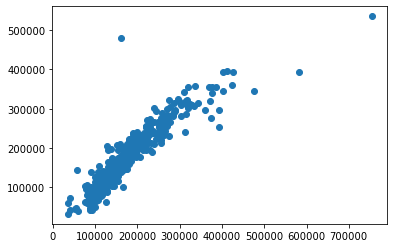

DECISION TREE


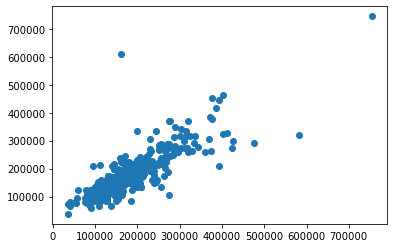

RANDOM FOREST


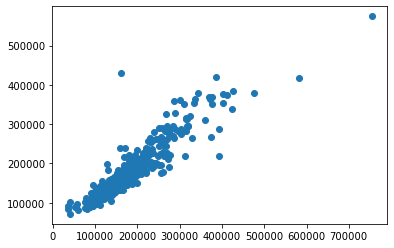

GRADIENT BOOSTING


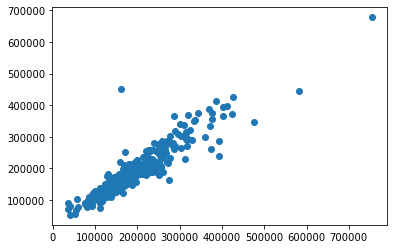

XGBOOSTING


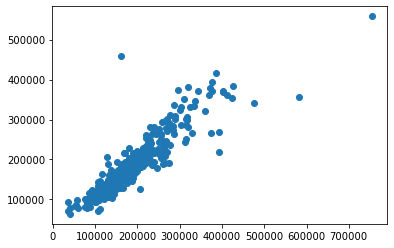

In [46]:
result = model_building(df,y)

In [47]:
algo = []
mse = []
for key, value in result.items():
    algo.append(key)
    mse.append(value[2])

In [48]:
temp = pd.DataFrame({
    'MODEL': algo,
    'ERROR': mse
})

In [49]:
temp

,MODEL,ERROR
0,Linear Regression,19551.991229
1,Decision Tree,26814.264840
2,Random forest,18257.548037
3,Gradient Boosting,17018.911542
4,XGBoosting,18699.158025


In [47]:
model = result['Gradient Boosting'][0]
model

GradientBoostingRegressor()

In [48]:
df = helper(test)

In [51]:
output = model.predict(df)

In [53]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": output
    })

In [55]:
submission.to_csv('submission.csv')

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'Neighborhood', 'ExterQual', 'GarageFinish']
LINEAR REGRESSION


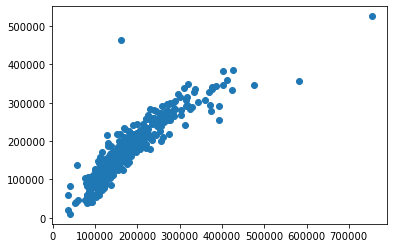

DECISION TREE


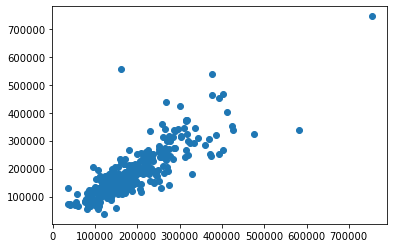

RANDOM FOREST


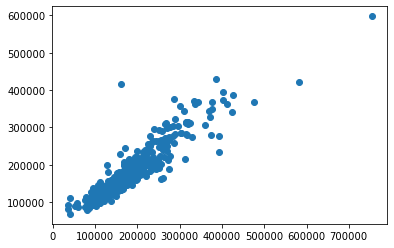

GRADIENT BOOSTING


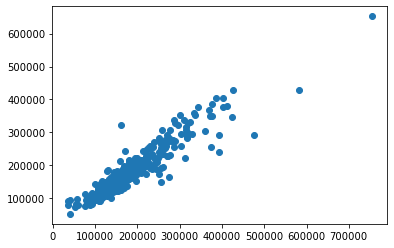

XGBOOSTING


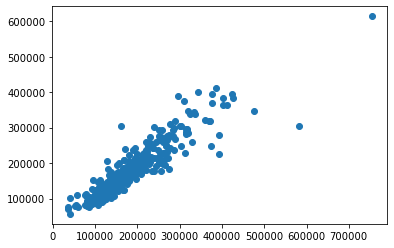

               MODEL         ERROR
0  Linear Regression  21631.343836
1      Decision Tree  28265.424658
2      Random forest  18785.375411
3  Gradient Boosting  17240.204402
4         XGBoosting  19024.755315


In [50]:
rf_model = result['Random forest'][0]
rf_model


importance = pd.concat([pd.Series(df.columns), pd.Series(rf_model.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)
feature_selected = importance[importance['importance']>=0.005]['feature']
feat = list(feature_selected)
print(feat)

result = model_building(df[feat],y)

algo = []
mse = []

for key, value in result.items():
    algo.append(key)
    mse.append(value[2])

temp = pd.DataFrame({
    'MODEL': algo,
    'ERROR': mse
})

print(temp)


In [51]:
df.shape

(1460, 76)

In [52]:
corr_matrix = pd.concat([df,y],axis=1).corr()
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
corr_matrix = corr_matrix[corr_matrix >= 0.1]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
feat = list(corr_matrix[corr_matrix['feature1']=='SalePrice']['feature2'])

In [53]:
corr_matrix[corr_matrix['feature1']=='SalePrice']

,feature1,feature2,Correlation
12,SalePrice,OverallQual,0.791965
14,SalePrice,GrLivArea,0.708153
24,SalePrice,GarageCars,0.644002
29,SalePrice,TotalBsmtSF,0.636999
32,SalePrice,GarageArea,0.630138
36,SalePrice,1stFlrSF,0.620743
41,SalePrice,ExterQual,0.614487
64,SalePrice,FullBath,0.560664
86,SalePrice,TotRmsAbvGrd,0.536067
88,SalePrice,GarageFinish,0.535855


LINEAR REGRESSION


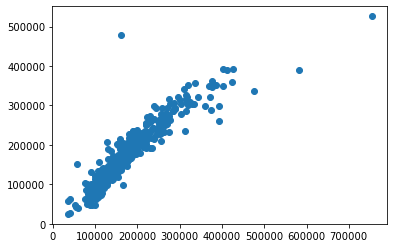

DECISION TREE


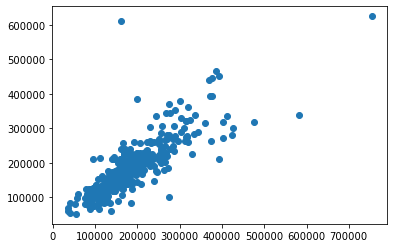

RANDOM FOREST


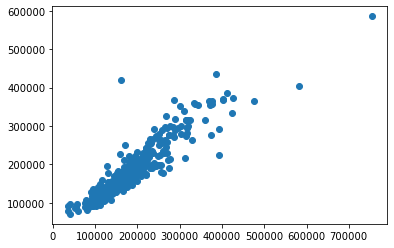

GRADIENT BOOSTING


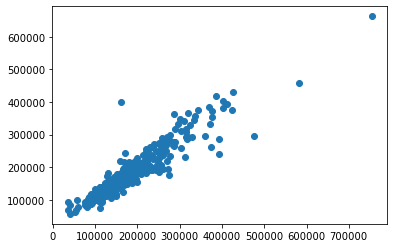

XGBOOSTING


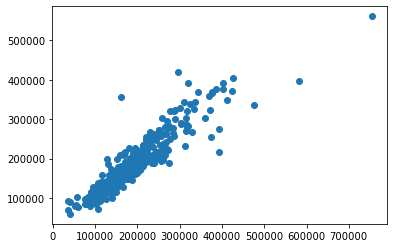

               MODEL         ERROR
0  Linear Regression  19049.925896
1      Decision Tree  26388.152968
2      Random forest  18118.774566
3  Gradient Boosting  16982.641620
4         XGBoosting  18479.704757


In [54]:
result = model_building(df[feat],y)

algo = []
mse = []
for key, value in result.items():
    algo.append(key)
    mse.append(value[2])

temp = pd.DataFrame({
    'MODEL': algo,
    'ERROR': mse
})

print(temp)